<a href="https://colab.research.google.com/github/salsabilawf/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**



1. **Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gamma correction pada citra
---------------------------------
Masukkan nilai gamma: 3


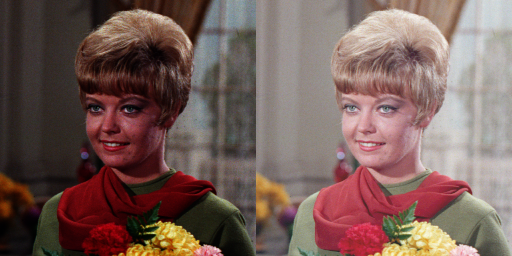

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow #for image 
from google.colab import drive
import matplotlib.pylab as plt
drive.mount('/content/drive')

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

  #akses perpiksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255*pow(original[y,x,c]/255,(1/gamma)),0,255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth 

Gamma correction pada citra
---------------------------------
Masukkan nilai bit depth: 1


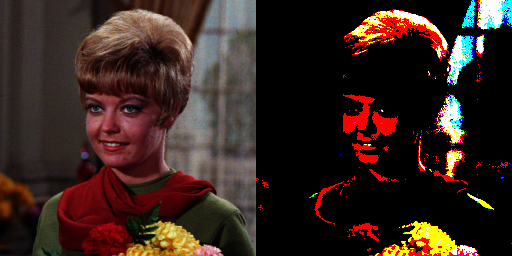

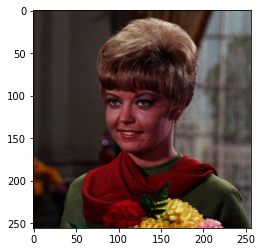

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow #for image 
from google.colab import drive
import matplotlib.pylab as plt

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)


print('Gamma correction pada citra')
print('---------------------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)

  #akses perpiksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

4. Buat image masking untuk image berikut. Image kiri adalah image asli
(images/teeth.jpg), sedangkan image kanan adalah hasilnya:

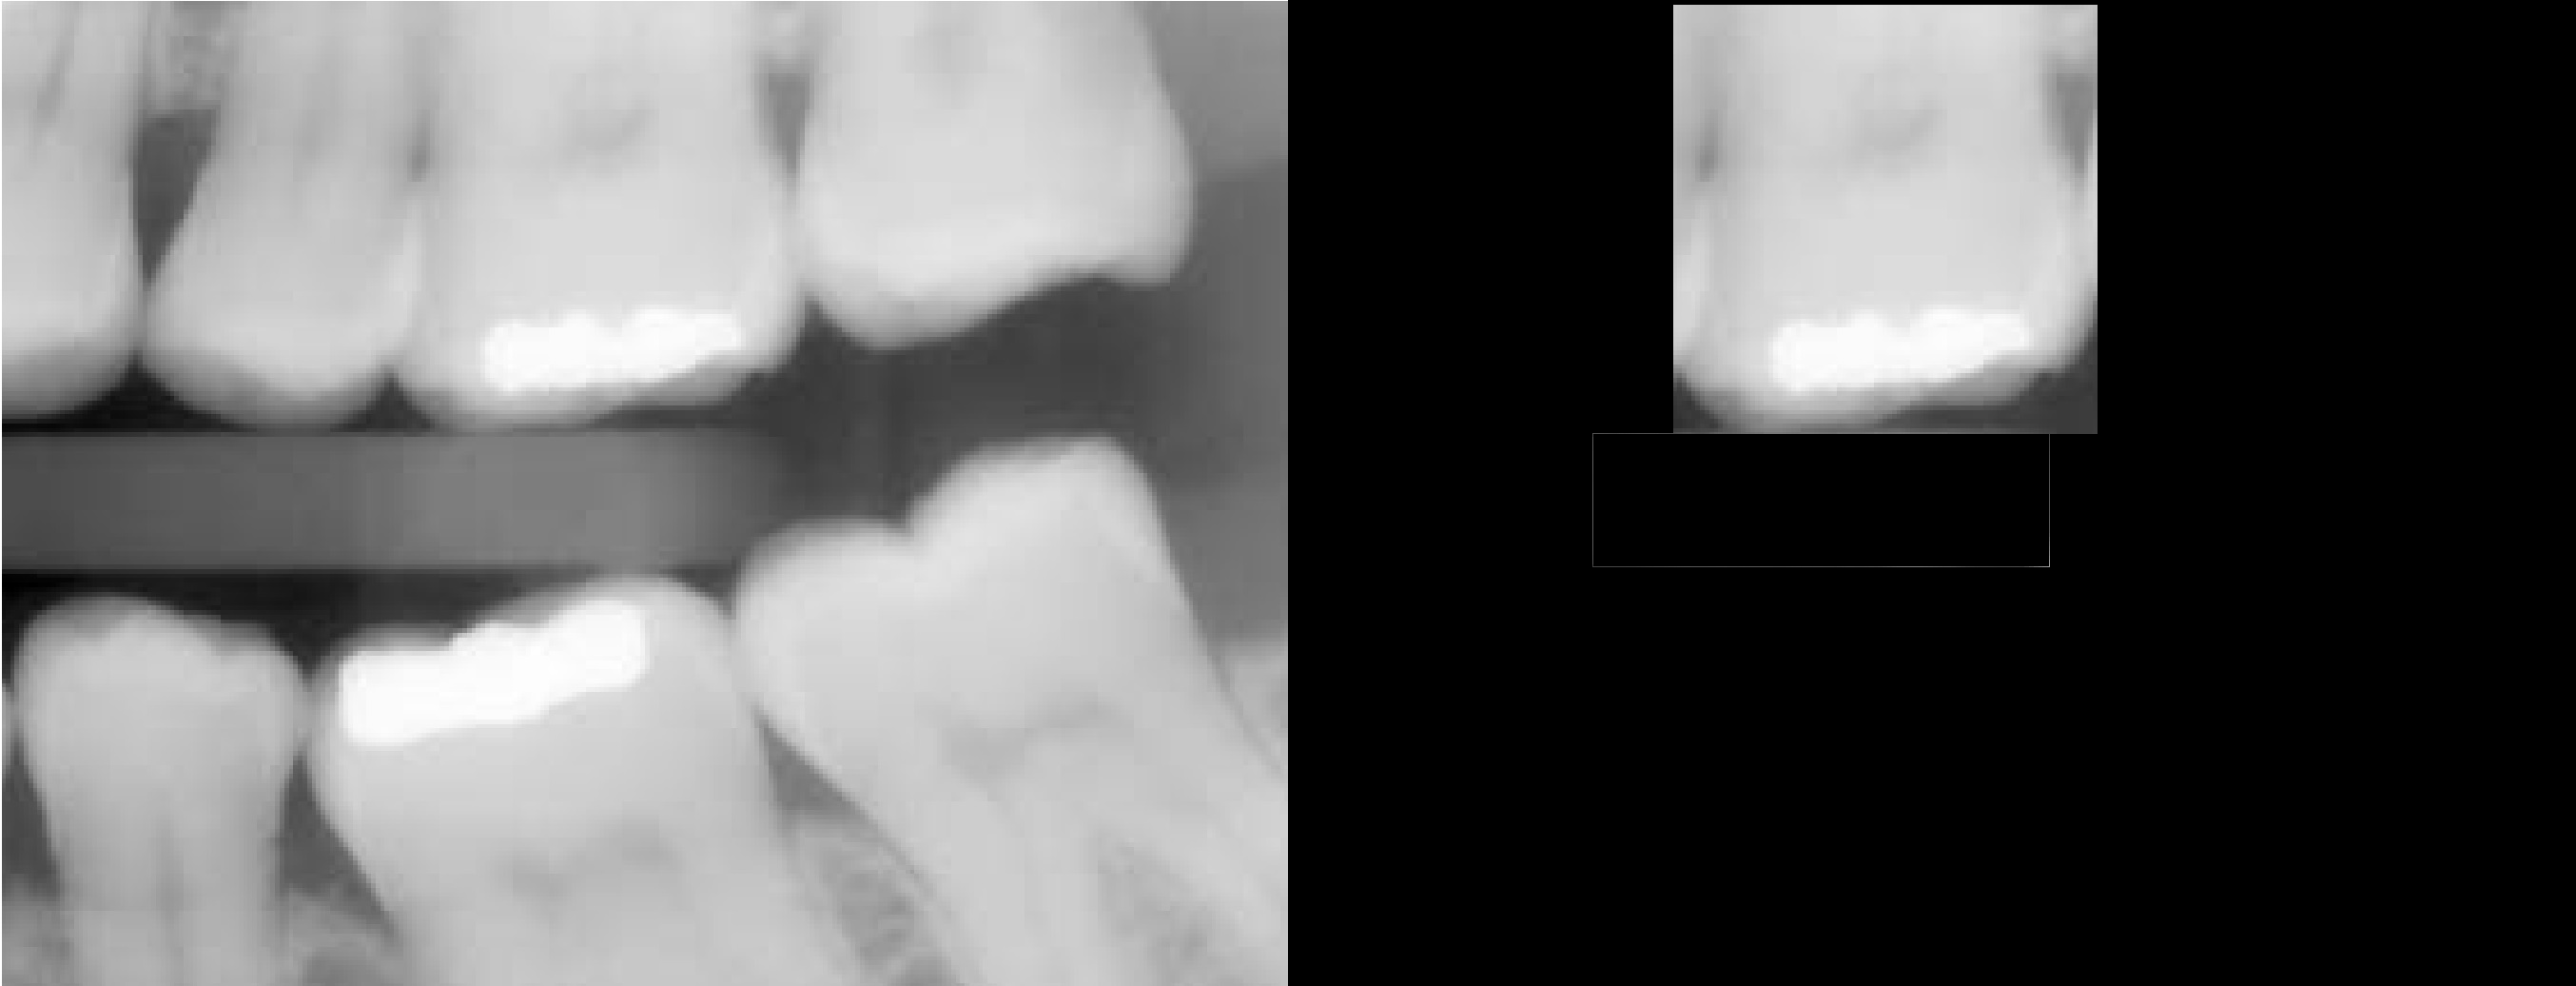

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,455),color=(255,255,255),thickness=1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

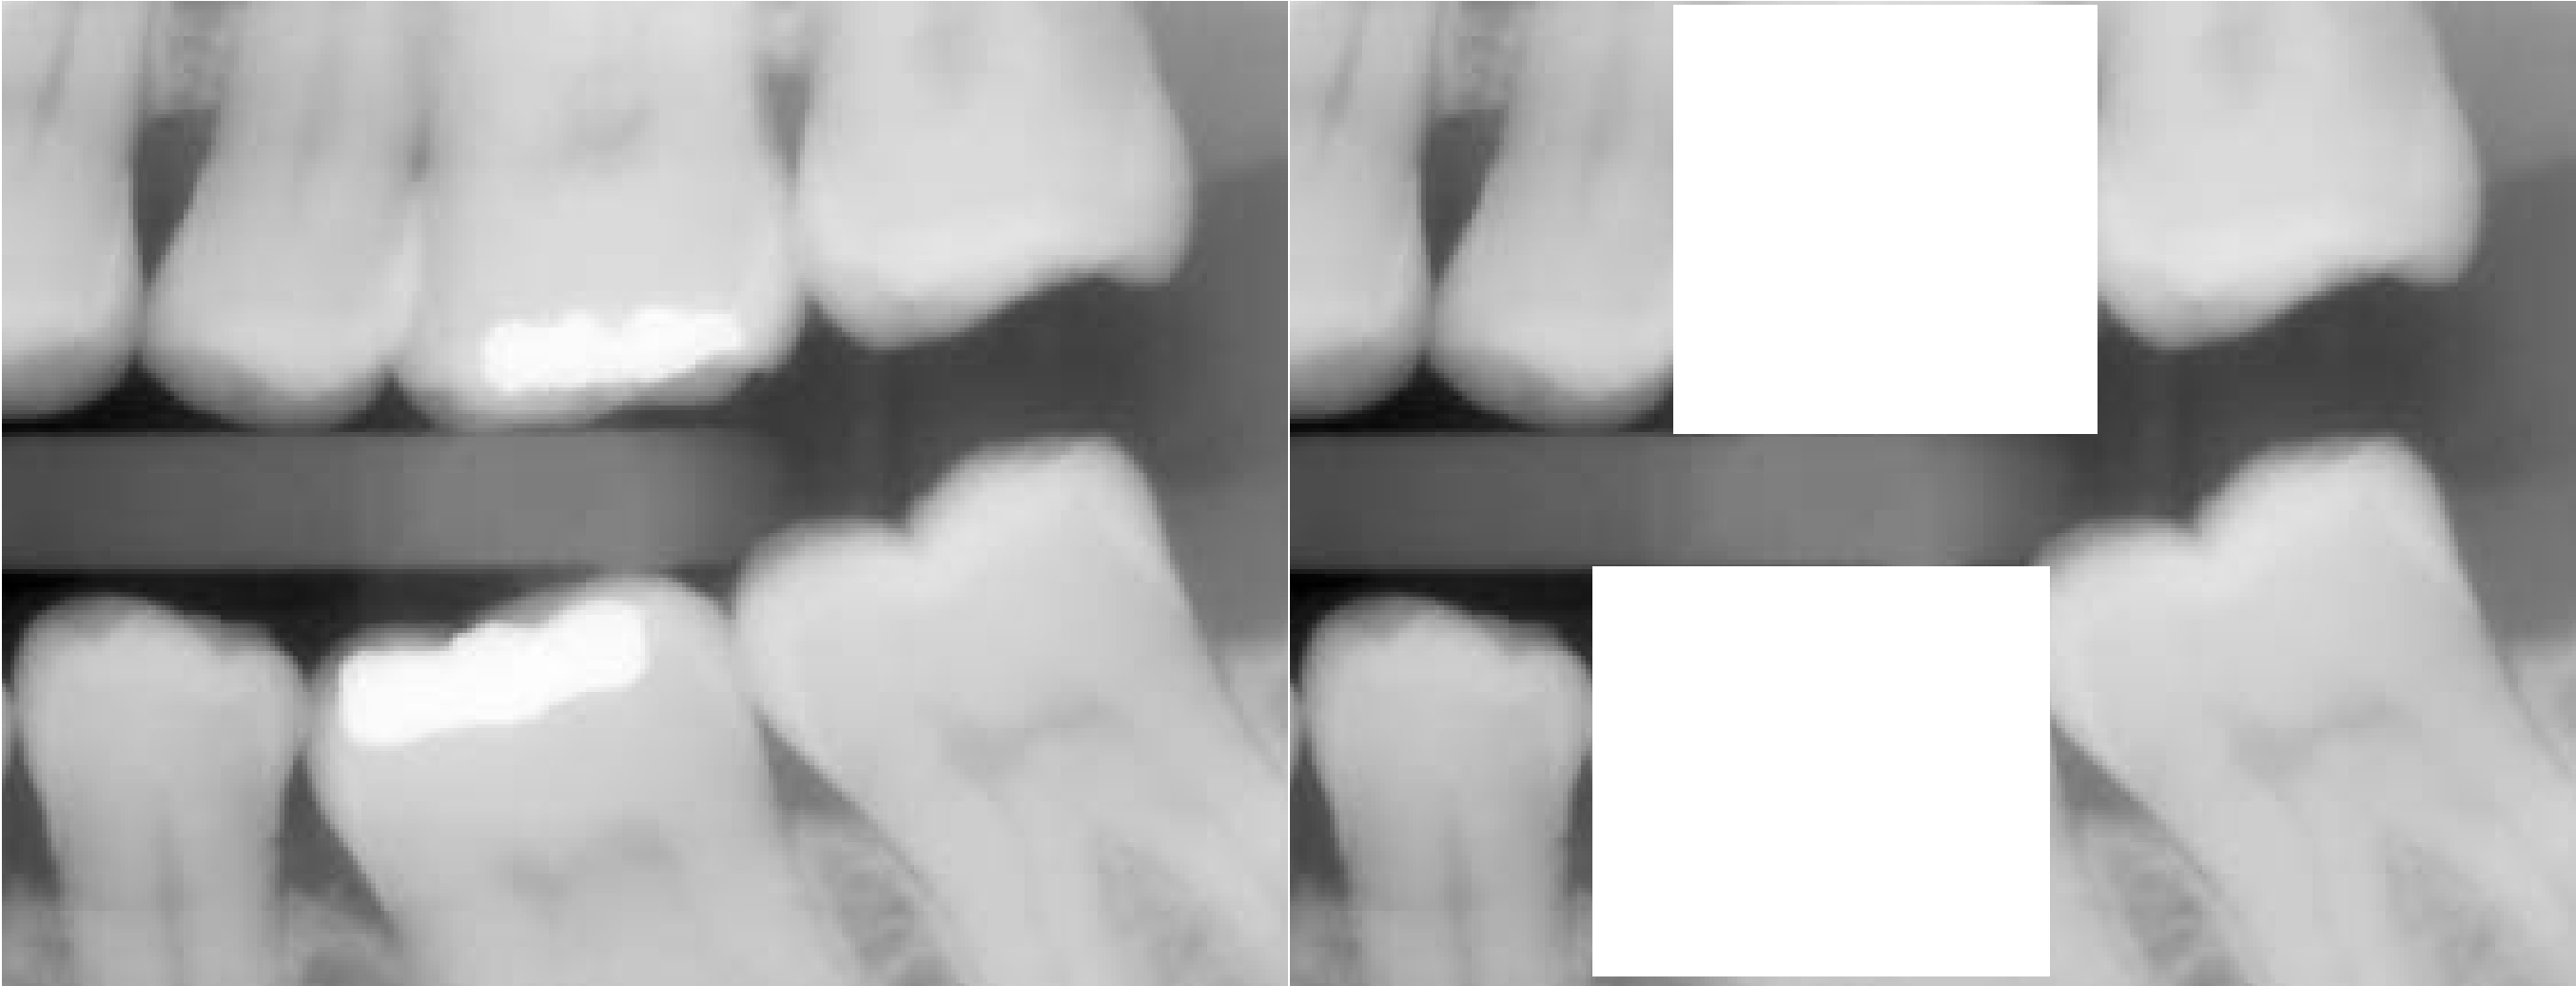

In [ ]:
#OR
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask_or = np.zeros(img.shape,dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

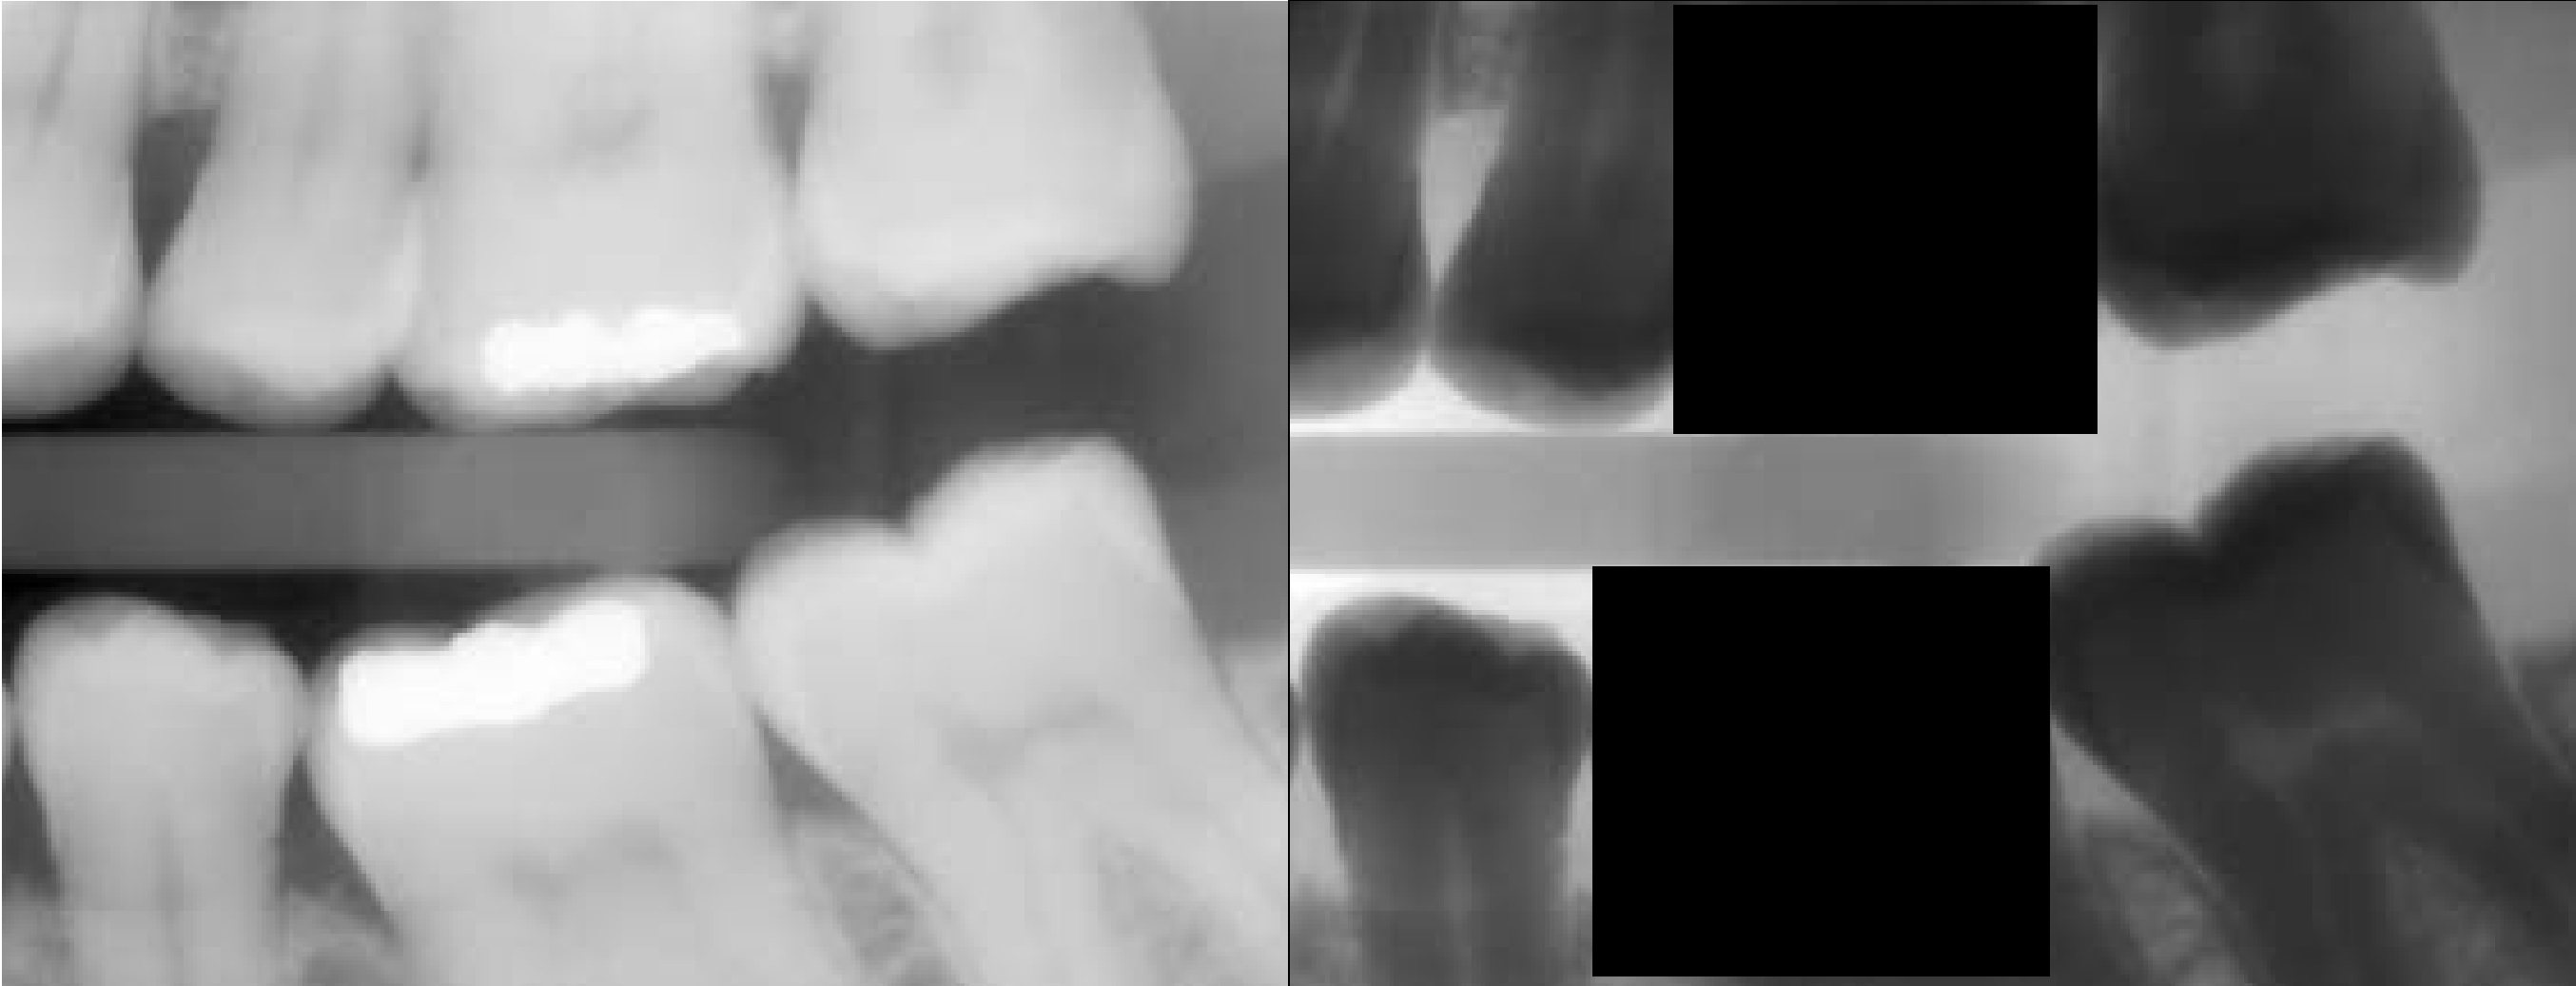

In [ ]:
#NOT
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask_not = np.zeros(img.shape,dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

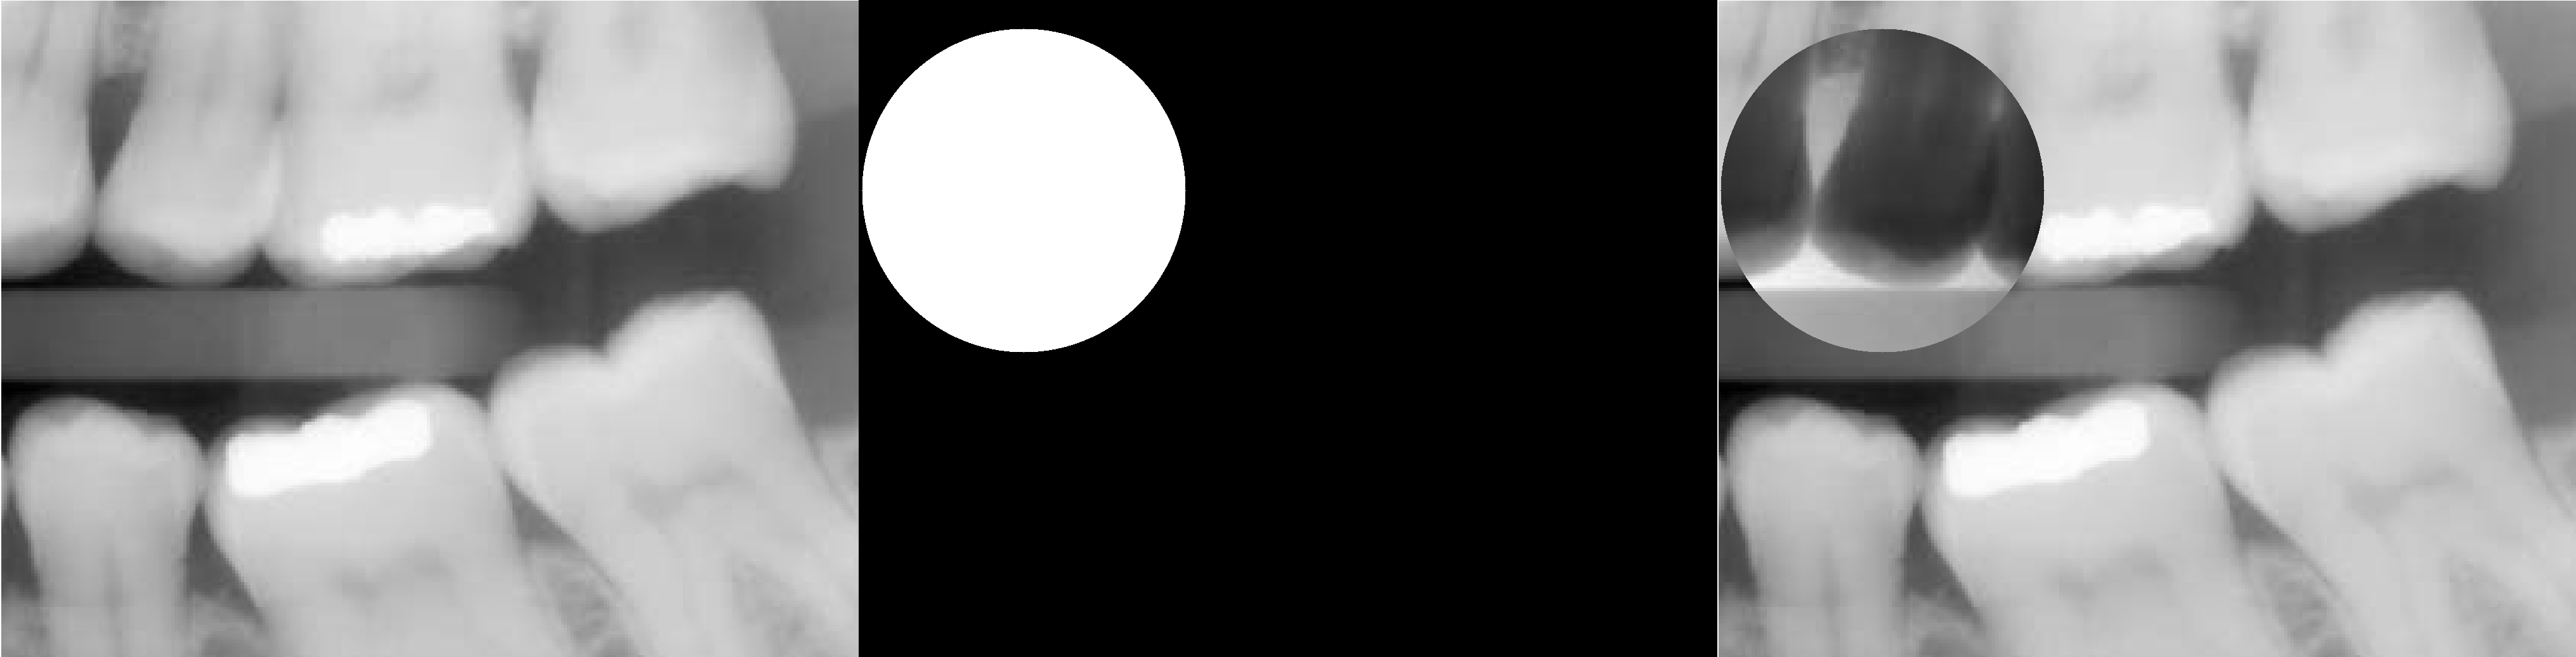

In [ ]:
#XOR
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask,(260,300), 255, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

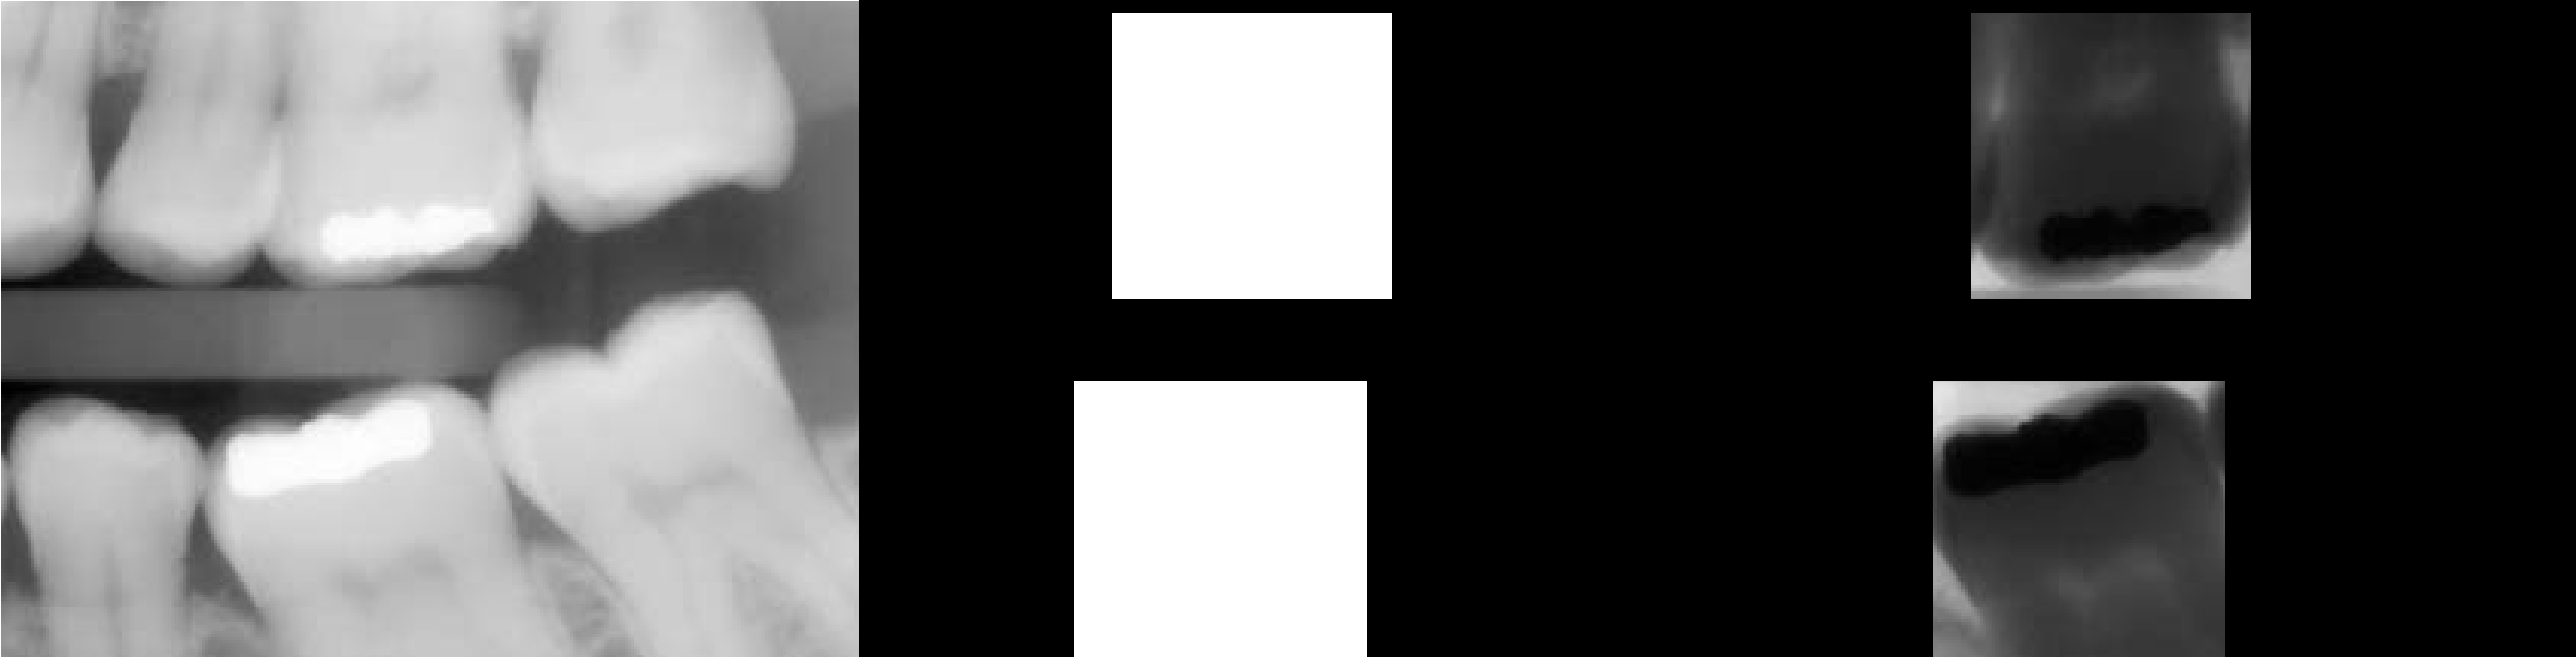

In [ ]:
#NAND
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow #for image 
from skimage import io
import matplotlib.pylab as plt

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(400,20),pt2=(840,470),color=(255,255,255),thickness=-1)
mask = cv.rectangle(mask,pt1=(340,600),pt2=(800,1200),color=(255,255,255),thickness=-1)

result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Hasil Analisis**

Operasi OR pada python dapat dilakukan menggunakan fungsi or() atau |. Citra A pada
operator OR akan tertempuk oleh citra B yang memiliki bentuk rectangle dan berwana
putih. Operasi NOT pada Python berarti negasi dari operand yang dimuat. Operator XOR pada Python adalah operasi logika dari OR Eksklusif. Operator XOR memberikan nilai kebenaran benar saat jumlah operand adalah ganjil. Pada gambar diatas citra B pada operasi XOR ditumpuk oleh citra A dan menghasilkan citra B berubah warna dari hitam ke putih. Operator AND pada python dapat dilakukan menggunakan function and() atau &. Nilai kebenaran operator AND adalah benar ketika kedua operand bernilai benar. Pada gambar diatas citra B Operasi AND akan
menumpuk citra A sehingga citra A akan tertutupi sebagian oleh citra B.
